In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

In [2]:
# 페이지 접근

url = "https://www.opinet.co.kr/searRgSelect.do"
driver = webdriver.Chrome('../driver/chromedriver.exe')
driver.get(url)
time.sleep(3)

In [15]:
# 지역 선택 태그
# <select id="SIDO_MNO"> ---> <option value="서울특별시">서울</option>

sido_list = driver.find_element(By.ID,"SIDO_NM0").find_elements(By.TAG_NAME, 'option')
sido_list[1].text

'서울'

In [16]:
# 반복해서 시 이름 담기
# get_attribute()로 속성 값을 얻어올 수 있다.
# <option value="서울특별시" >

sido_names = []

for option in sido_list:
    sido_names.append(option.get_attribute("value")) # 

In [17]:
sido_names

['',
 '서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도',
 '강원특별자치도']

In [18]:
sido_names = sido_names[1:]

In [19]:
sido_names[:5]

['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시']

In [20]:
##  서울시로 변경
sido_list_raw.send_keys(sido_names[0])

In [21]:
# 구 태그 정보 찾기

gu_list_raw = driver.find_element(By.ID,"SIGUNGU_NM0") # 상위태그,(부모태그)
gu_list = gu_list_raw.find_elements(By.TAG_NAME,"option") # 하위태그 (자식태그) -> 총 25개

# option 태그 마다 value 속성에 있는 구이름을 빼오기
gu_names = [option.get_attribute("value") for option in gu_list] 

gu_names = gu_names[1:] # 맨앞 빈 값 제거
gu_names[:5], len(gu_names)

(['강남구', '강동구', '강북구', '강서구', '관악구'], 25)

In [22]:
gu_list_raw.send_keys(gu_names[0])

In [23]:
import time
from tqdm.notebook import tqdm

for gu in tqdm(gu_names):
    element = driver.find_element(By.ID,"SIGUNGU_NM0") # 구 선택창에 접근
    element.send_keys(gu) # 구 선택창에 구이름 선택하게 만들기
    time.sleep(3) # 너무 빠르게 진행하면 웹사이트반응보다 빠를 수 있어 시간텀을 주는 것이 좋다.
    
    driver.find_element(By.CSS_SELECTOR, "#glopopd_excel > span").click() # 엑셀로 저장

  0%|          | 0/25 [00:00<?, ?it/s]

In [24]:
driver.close()

In [25]:
driver.quit()

In [26]:
import pandas as pd
from glob import glob

In [37]:
# 비슷한 파일명을 묶어서 리스트로 불러오기

stations_files = glob("../data/지역_*.xls")
stations_files

['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (10).xls',
 '../data\\지역_위치별(주유소) (11).xls',
 '../data\\지역_위치별(주유소) (12).xls',
 '../data\\지역_위치별(주유소) (13).xls',
 '../data\\지역_위치별(주유소) (14).xls',
 '../data\\지역_위치별(주유소) (15).xls',
 '../data\\지역_위치별(주유소) (16).xls',
 '../data\\지역_위치별(주유소) (17).xls',
 '../data\\지역_위치별(주유소) (18).xls',
 '../data\\지역_위치별(주유소) (19).xls',
 '../data\\지역_위치별(주유소) (2).xls',
 '../data\\지역_위치별(주유소) (20).xls',
 '../data\\지역_위치별(주유소) (21).xls',
 '../data\\지역_위치별(주유소) (22).xls',
 '../data\\지역_위치별(주유소) (23).xls',
 '../data\\지역_위치별(주유소) (24).xls',
 '../data\\지역_위치별(주유소) (3).xls',
 '../data\\지역_위치별(주유소) (4).xls',
 '../data\\지역_위치별(주유소) (5).xls',
 '../data\\지역_위치별(주유소) (6).xls',
 '../data\\지역_위치별(주유소) (7).xls',
 '../data\\지역_위치별(주유소) (8).xls',
 '../data\\지역_위치별(주유소) (9).xls',
 '../data\\지역_위치별(주유소).xls']

In [38]:
# 엑셀데이터 한 개 예시로 보기
tmp = pd.read_excel(stations_files[0], header=2) # 엑셀 켜보면 0, 1 행은 필요없는 행
tmp.head(2)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,1543,1393,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1584,1465,-


In [39]:
# 엑셀 데이터를 순차적으로 새로운 리스트에 담자.
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2) # 엑셀 켜보면 0, 1 행은 필요없는 행
    tmp_raw.append(tmp)
    
len(tmp_raw)

25

In [40]:
tmp_raw[0].head(2)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,1543,1393,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1584,1465,-


In [42]:
# 형식이 동일하니 연달아 붙이자.
station_raw = pd.concat(tmp_raw)
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,1543,1393,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1584,1465,-
2,서울특별시,명일주유소,서울 강동구 고덕로 168 (명일동),SK에너지,02-3428-1739,Y,1825,1595,1495,-
3,서울특별시,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),GS칼텍스,02-441-3327,Y,1795,1595,1475,1585
4,서울특별시,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-6956-6674,Y,1846,1596,1478,1590


In [43]:
# 필요한 컬럼만 다시 추출
# 우리가 볼 데이터는 상호,주소,가격,셀프,상표 니까 이 데이터들만 따로 추출

stations = pd.DataFrame(
    {
        "상호" : station_raw["상호"],
        "주소" : station_raw["주소"],
        "가격" : station_raw["휘발유"],
        "셀프" : station_raw["셀프여부"],
        "상표" : station_raw["상표"],
    }
)
stations.tail()

,상호,주소,가격,셀프,상표
29,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2188,N,현대오일뱅크
30,갤러리아주유소,서울 강남구 압구정로 426,2262,N,SK에너지
31,SK논현주유소,서울 강남구 논현로 747 (논현동),2355,N,SK에너지
32,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2398,N,현대오일뱅크
33,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2578,N,GS칼텍스


# 주소컬럼에서 구 이름을 추출해 새로운 컬럼으로 만들자.

In [44]:
# (List Comprehension) 활용
stations["구"] = [eachAddr.split()[1] for eachAddr in stations["주소"]]
stations.head()

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1543,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1584,N,현대오일뱅크,강동구
2,명일주유소,서울 강동구 고덕로 168 (명일동),1595,Y,SK에너지,강동구
3,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1595,Y,GS칼텍스,강동구
4,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1596,Y,GS칼텍스,강동구


In [45]:
## 가격 데이터형 확인

stations["가격"].unique()

array([1543, 1584, 1595, 1596, 1629, 1630, 1631, 1655, 1695, 1799, 1898,
       1509, 1525, 1527, 1530, 1555, 1565, 1575, 1588, 1597, 1599, 1625,
       1648, 1549, 1560, 1579, 1594, 1609, 1765, 1537, 1557, 1638, 1699,
       1529, 1534, 1539, 1544, 1559, 1564, 1569, 1624, 1505, 1545, 1577,
       1585, 1586, 1587, 1589, 1600, 1603, 1606, 1619, 1623, 1626, 1659,
       1793, 1938, 1989, 1572, 1578, 1693, 1698, 1738, 1893, 1933, 1998,
       2170, 1507, 1519, 1524, 1535, 1563, 1574, 1567, 1568, 1573, 1610,
       1613, 1614, 1678, 1838, 1497, 1512, 1514, 1553, 1598, '1513',
       '1540', '1545', '1565', '1570', '1584', '1593', '1595', '1599',
       '1619', '1895', '1898', '2050', '2110', '2199', '-', 1518, 1548,
       1627, 1798, 1995, 1999, 2019, 2021, 2195, 2217, 2585, 1495, 1694,
       1730, 2075, 2168, 2240, 2250, 1665, 1819, 2246, 2359, 2587, 1517,
       1513, 1515, 1554, 1608, 1618, 1639, 1647, 1658, 1939, 1566, 1696,
       1718, 1556, 1657, 1757, 1542, 1581, 1687, 2159, 161

In [46]:
stations = stations[stations["가격"] != "-"].copy()

In [47]:
stations["가격"].unique()

array([1543, 1584, 1595, 1596, 1629, 1630, 1631, 1655, 1695, 1799, 1898,
       1509, 1525, 1527, 1530, 1555, 1565, 1575, 1588, 1597, 1599, 1625,
       1648, 1549, 1560, 1579, 1594, 1609, 1765, 1537, 1557, 1638, 1699,
       1529, 1534, 1539, 1544, 1559, 1564, 1569, 1624, 1505, 1545, 1577,
       1585, 1586, 1587, 1589, 1600, 1603, 1606, 1619, 1623, 1626, 1659,
       1793, 1938, 1989, 1572, 1578, 1693, 1698, 1738, 1893, 1933, 1998,
       2170, 1507, 1519, 1524, 1535, 1563, 1574, 1567, 1568, 1573, 1610,
       1613, 1614, 1678, 1838, 1497, 1512, 1514, 1553, 1598, '1513',
       '1540', '1545', '1565', '1570', '1584', '1593', '1595', '1599',
       '1619', '1895', '1898', '2050', '2110', '2199', 1518, 1548, 1627,
       1798, 1995, 1999, 2019, 2021, 2195, 2217, 2585, 1495, 1694, 1730,
       2075, 2168, 2240, 2250, 1665, 1819, 2246, 2359, 2587, 1517, 1513,
       1515, 1554, 1608, 1618, 1639, 1647, 1658, 1939, 1566, 1696, 1718,
       1556, 1657, 1757, 1542, 1581, 1687, 2159, 1617, 17

In [48]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 33
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호      442 non-null    object
 1   주소      442 non-null    object
 2   가격      442 non-null    object
 3   셀프      442 non-null    object
 4   상표      442 non-null    object
 5   구       442 non-null    object
dtypes: object(6)
memory usage: 24.2+ KB


In [49]:
# 인덱스를 재정렬하자

stations.reset_index(inplace=True)
stations.tail()

,index,상호,주소,가격,셀프,상표,구
437,29,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2188,N,현대오일뱅크,강남구
438,30,갤러리아주유소,서울 강남구 압구정로 426,2262,N,SK에너지,강남구
439,31,SK논현주유소,서울 강남구 논현로 747 (논현동),2355,N,SK에너지,강남구
440,32,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2398,N,현대오일뱅크,강남구
441,33,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2578,N,GS칼텍스,강남구


In [50]:
stations["가격"] = stations["가격"].copy().astype("float")
stations.head()

,index,상호,주소,가격,셀프,상표,구
0,0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1543.0,Y,현대오일뱅크,강동구
1,1,구천면주유소,서울 강동구 구천면로 357 (암사동),1584.0,N,현대오일뱅크,강동구
2,2,명일주유소,서울 강동구 고덕로 168 (명일동),1595.0,Y,SK에너지,강동구
3,3,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1595.0,Y,GS칼텍스,강동구
4,4,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1596.0,Y,GS칼텍스,강동구


In [51]:
# 데이터 프레임에 있는 index 컬럼을 삭제하자.
del stations["index"]
stations.head()

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1543.0,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1584.0,N,현대오일뱅크,강동구
2,명일주유소,서울 강동구 고덕로 168 (명일동),1595.0,Y,SK에너지,강동구
3,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1595.0,Y,GS칼텍스,강동구
4,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1596.0,Y,GS칼텍스,강동구


In [52]:
stations.to_csv(
    "../data/04. Self Oil Station rawdata.csv",
    encoding="euc-kr"
)

In [61]:
df = pd.read_csv("../data/04. Self Oil Station rawdata.csv", index_col=0, encoding="euc-kr")
df

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1543.0,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1584.0,N,현대오일뱅크,강동구
2,명일주유소,서울 강동구 고덕로 168 (명일동),1595.0,Y,SK에너지,강동구
3,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1595.0,Y,GS칼텍스,강동구
4,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1596.0,Y,GS칼텍스,강동구
...,...,...,...,...,...,...
437,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2188.0,N,현대오일뱅크,강남구
438,갤러리아주유소,서울 강남구 압구정로 426,2262.0,N,SK에너지,강남구
439,SK논현주유소,서울 강남구 논현로 747 (논현동),2355.0,N,SK에너지,강남구
440,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2398.0,N,현대오일뱅크,강남구


## 시각화

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform # platform.system() => 운영체제 확인
from matplotlib import font_manager, rc

get_ipython().run_line_magic("matplotlib","inline") # == %matplotlib inline

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin" : # 맥? 일 경우
    rc("font", family = "Arial Unicode MS")
elif platform.system() == "Windows" : # 윈도우 일 경우
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("Unkown system. sorry!")

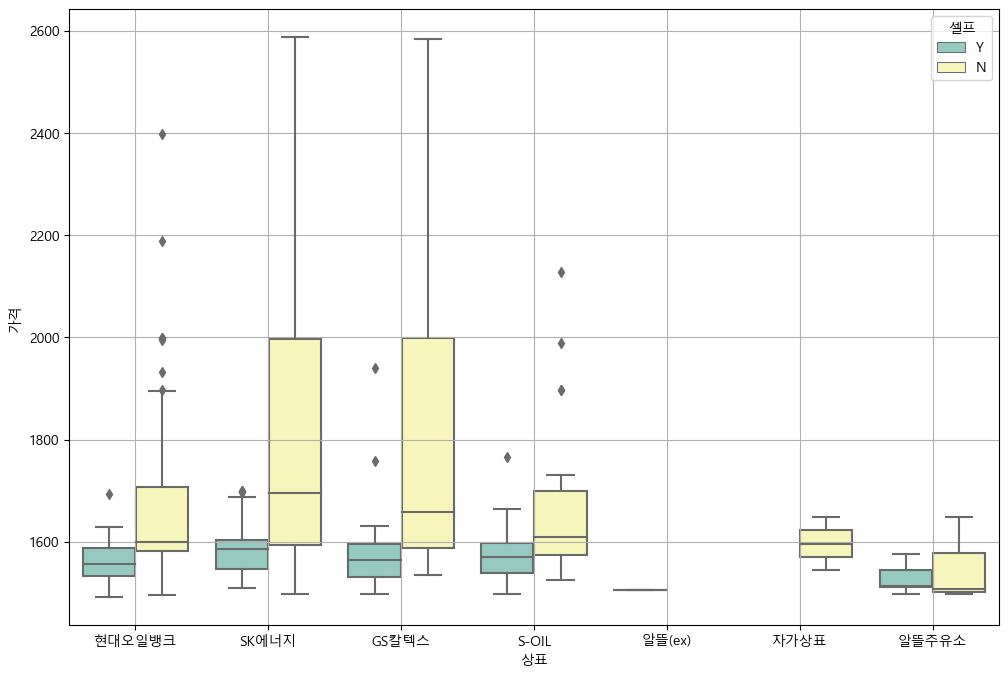

In [63]:
# seaborn으로 boxplot 해보자 2

plt.figure(figsize = (12,8))
sns.boxplot(x="상표", y="가격", hue="셀프", data=stations,palette ="Set3")
plt.grid(True)
plt.show()

## 지도 시각화

In [64]:
import json
import folium
import folium.features
#import warnings
#warnings.simplefilter(action="ignore", category=FutureWarning)

In [66]:
# 가장 값이 싼 주유소 10개를 뽑아보자

stations.sort_values(by="가격", ascending=True).head(10)

,상호,주소,가격,셀프,상표,구
392,이케이에너지(주) 도선주유소,서울 도봉구 도봉로 941 (도봉동),1491.0,Y,현대오일뱅크,도봉구
238,(주)디오티디 은평유니콘주유소,서울 은평구 통일로 1151 (진관동),1495.0,N,현대오일뱅크,은평구
164,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1497.0,N,SK에너지,양천구
165,현대주유소,서울 양천구 남부순환로 372 (신월동),1497.0,Y,S-OIL,양천구
166,플라트(주)서호주유소,서울 양천구 남부순환로 317,1497.0,Y,GS칼텍스,양천구
286,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),1497.0,N,알뜰주유소,강서구
287,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),1497.0,Y,현대오일뱅크,강서구
288,화곡역주유소,서울 강서구 강서로 154 (화곡동),1497.0,Y,알뜰주유소,강서구
67,만남의광장주유소,서울 서초구 양재대로12길 73-71,1505.0,Y,알뜰(ex),서초구
113,원천주유소,서울 성북구 돌곶이로 142 (장위동),1507.0,N,알뜰주유소,성북구


In [67]:
# pivot_table을 활용해 구 별로 가격 값을 표현하자.

import numpy as np

gu_data = pd.pivot_table(
    data=stations,
    index="구",
    values="가격",
    aggfunc=np.mean)

gu_data.head()

,가격
구,
강남구,1836.735294
강동구,1648.285714
강북구,1530.000000
강서구,1592.151515
관악구,1615.857143


In [68]:
geo_path = "../data/02. skorea_municipalities_geo_simple.json" # 경계선자료
geo_str = json.load(open(geo_path, encoding="utf-8"))

my_map = folium.Map(
    location=[37.5502, 126.982],
    zoom_start=10.5,
    tiles="Stamen Toner"
)

folium.features.Choropleth(
    geo_data=geo_str,
    data=gu_data,
    columns=[gu_data.index,"가격"],
    key_on="feature.id",
    fill_color="PuRd"
).add_to(my_map)
my_map